### Multiple (Multivariate) Linear Regression - More than one feature

#### 1. Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# function to read data and get features and labels
# arguments: filename
# return values: features and labels numpy arrays
def readData (file):
    data = pd.read_csv (file)
    features = data.iloc [:, : -2].values
    labels = data.iloc [:, -1].values
    return features, labels

In [3]:
# function to normalize data
# arguments: data
# return values: normalized data
def normalize (data):
    mins = np.min (data, axis = 0)
    maxs = np.max (data, axis = 0)
    return (data - mins)/ (maxs- mins)

In [4]:
# function to add a column at the end - bias
# arguments: data
# return values: data with an extra column of ones for bias
def addColumn (data):
    print (data.shape [0])
    return np.append (data, np.ones ((data.shape [0], 1)), axis = 1)

In [5]:
# forward pass
# arguments: features, weights matrix - last term is bias
# return values: X * weights
def forwardPass (X, weights):
    return np.dot (X, weights)

In [6]:
# cost function - mean squared error
# arguments: predicted values of y, actual y
# return values: cost
def costCalculator (yhat, Y):
    return (1/ (2 * len (yhat))) * np.sum ((yhat - Y) ** 2)

In [7]:
# gradient descent algorithm
# arguments: X, Y, learning rate and iterations
# return value: weight and costs
def gradientDescent (X, Y, learningRate = 0.1, iterations = 10000):
    weights = np.zeros ([X.shape [1]])
    costs = []
    for _ in range (iterations):
        yhat = forwardPass (X, weights)
        cost = costCalculator (yhat, Y)
        costs.append (cost)
        weights = weights - ((learningRate/ len (X)) * np.dot ((yhat - Y), X))
    return weights, costs

In [8]:
X, Y = readData ('./Data/50_Startups.csv')

In [9]:
Xnorm = normalize (X)
Xnorm = addColumn (Xnorm)

50


In [10]:
weights, costs = gradientDescent (Xnorm, Y)

Text(0,0.5,'Cost')

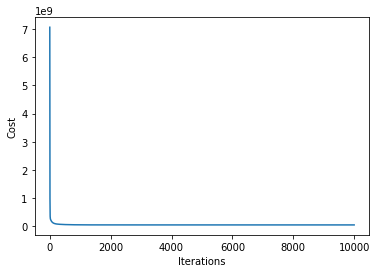

In [11]:
# plot the cost vs iteration# plot  
plt.plot (range (10000), costs)
plt.xlabel ('Iterations')
plt.ylabel ('Cost')

In [12]:
# last value is the bias
print  ("Weights: "  + str (weights))

Weights: [133224.31652669  -3522.59642569  12845.79194567  48746.97759784]


In [13]:
# calculate the cost on trained data
numpyModelCost = costCalculator (forwardPass (Xnorm, weights), Y)
print ("Cost: " + str (numpyModelCost))

Cost: 39208563.00957523


#### 2. Scikit learn - to verify our model

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()

In [15]:
lr.fit (Xnorm, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print ("Weights: "  + str (lr.coef_))
print ("Bias: " + str (lr.intercept_))

Weights: [133224.33893153  -3522.61050298  12845.7680468       0.        ]
Bias: 48746.985928441674


In [17]:
# calculate the cost on trained data
scikitModelCost = costCalculator (lr.predict (Xnorm), Y)
print ("Cost: " + str (scikitModelCost))

Cost: 39208563.00956541


#### 3. Setting up a grid search in numpy

Identify the parameters that can be tuned - iterations and learning rate. These are called hyper-parameters

In [18]:
iterations = [100, 1000, 10000]
learningRates = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
gridSearch = []
for i in range (len (learningRates)):
    for j in range (len (iterations)):
        eachSearch = []
        weights, costs = gradientDescent (Xnorm, Y, learningRate = learningRates [i], iterations = iterations [j])
        eachSearch.append (learningRates [i])
        eachSearch.append (iterations [j])
        eachSearch.append (costs [-1])
        gridSearch.append (eachSearch)

In [19]:
gridData = pd.DataFrame (gridSearch, columns = ['Learning Rate', 'Iterations', 'Error/ Cost'])

In [20]:
gridData

,Learning Rate,Iterations,Error/ Cost
0,0.001,100,5.110855e+09
1,0.001,1000,4.949452e+08
2,0.001,10000,1.178294e+08
3,0.003,100,2.723381e+09
4,0.003,1000,2.211499e+08
5,0.003,10000,6.295284e+07
6,0.010,100,4.961569e+08
7,0.010,1000,1.178729e+08
8,0.010,10000,4.207403e+07
9,0.030,100,2.217098e+08
